# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=100)
lngs = np.random.uniform(low=-180.000, high=180.000, size=100)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Create a DataFrame to hold the cities data
cities_df=pd.DataFrame(cities)

cities_df["Country"]=""
cities_df["Cloudiness"]=""
cities_df["Date"]=""
cities_df["Humidity"]=""
cities_df["Lat"]=""
cities_df["Lng"]=""
cities_df["Max Temp"]=""
cities_df["Wind Speed"]=""
cities_df=cities_df.rename(columns={0:"CityName"})
cities_df['CityName'] = (cities_df['CityName'].str.title())

unique = len(cities_df['CityName'].unique())
print(unique)
cities_df.head()

84


,CityName,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Batemans Bay,,,,,,,,
1,Coihaique,,,,,,,,
2,Kushmurun,,,,,,,,
3,Cidreira,,,,,,,,
4,Aldan,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
weatherdata = []
notfound = []
record = 0
set = 1
print("Beginning Data Retrieval")

# Build query URL, get weather data for each city:
for index, row in cities_df.iterrows():
    city = row['CityName']
    query_url = f"{url}appid={api_key}&units={units}&q={city}"

    #store request response
    weather_responses = requests.get(query_url).json()
    
    #increment for data log output
    if record >= 50 and record % 50 == 0:
        record = 0
        set += 1
    
    #sleep for 1 second to call only 60 per minute
    time.sleep(1)
    
    #append each weather response to weatherdata list
    weatherdata.append(weather_responses)

        
    try:
        cities_df.loc[index, 'Cloudiness'] = weatherdata[index]['clouds']['all']
        cities_df.loc[index, 'Country'] = weatherdata[index]['sys']['country']
        cities_df.loc[index, 'Date'] = weatherdata[index]['dt']
        cities_df.loc[index, 'Humidity'] = weatherdata[index]['main']['humidity']
        cities_df.loc[index, 'Lat'] = weatherdata[index]['coord']['lat']
        cities_df.loc[index, 'Lng'] = weatherdata[index]['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = weatherdata[index]['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = weatherdata[index]['wind']['speed']
        record += 1
        print(f"Processing Record {record} of Set {set} | {city}")
        
    except (KeyError, IndexError):
        notfound.append(index)
        print("City not found. Skipping...")


Beginning Data Retrieval
Processing Record 1 of Set 1 | Batemans Bay
Processing Record 2 of Set 1 | Coihaique
City not found. Skipping...
Processing Record 3 of Set 1 | Cidreira
Processing Record 4 of Set 1 | Aldan
Processing Record 5 of Set 1 | Chuy
City not found. Skipping...
Processing Record 6 of Set 1 | Minot
Processing Record 7 of Set 1 | Souillac
City not found. Skipping...
Processing Record 8 of Set 1 | Atherton
Processing Record 9 of Set 1 | Borogontsy
Processing Record 10 of Set 1 | Lumphat
Processing Record 11 of Set 1 | Kavaratti
Processing Record 12 of Set 1 | Cherskiy
Processing Record 13 of Set 1 | Codrington
Processing Record 14 of Set 1 | Portmore
Processing Record 15 of Set 1 | Golkoy
Processing Record 16 of Set 1 | Mataura
Processing Record 17 of Set 1 | Yulara
Processing Record 18 of Set 1 | Castro
Processing Record 19 of Set 1 | Lubango
Processing Record 20 of Set 1 | Albany
Processing Record 21 of Set 1 | Ahipara
Processing Record 22 of Set 1 | Hermanus
Processing

In [4]:
#drop rows with incomplete data, print df
cities_df=cities_df.drop(notfound)

#verify that end of file data matches
cities_df.tail()

,CityName,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
79,Abu Kamal,SY,13,1570755777,24,34.45,40.92,75.16,4.46
80,Atuona,PF,3,1570755779,67,-9.8,-139.03,79.09,9.25
81,Ushuaia,AR,75,1570755780,92,-54.81,-68.31,28.4,28.86
82,Novyy Urgal,RU,77,1570755781,61,51.07,132.56,33.78,8.55
83,New Norfolk,AU,75,1570755782,66,-42.78,147.06,54,8.05


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
cities_df.to_csv("Mandell2WeatherData.csv", index=False, header=True)

In [ ]:
cities_df.head(5)

In [5]:
from datetime import datetime
date=cities_df.iloc[1,3]
#datetime.fromtimestamp(int(date))

datetime=time.strftime("%D %H:%M", time.localtime(int(date)))
strdate=str(datetime)
strdate

weatherdate=strdate.split(" ")[0]
weatherdate

'10/10/19'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

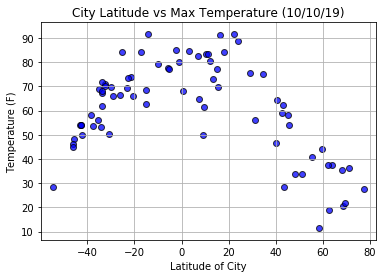

In [16]:
latitude=cities_df.loc[:, "Lat"]
temp=cities_df.loc[:, "Max Temp"]

plt.scatter(latitude, temp, marker="o", facecolors="blue", edgecolors="black", alpha=.75)

plt.xlim(min(cities_df["Lat"]-5), max(cities_df["Lat"]+5))
plt.ylim(min(cities_df["Max Temp"])-5, max(cities_df["Max Temp"]+5))

plt.title(f"City Latitude vs Max Temperature ({weatherdate})")
plt.xlabel("Latitude of City")
plt.ylabel("Temperature (F)")
plt.grid()
plt.savefig('Temperature_vs_Lat')
plt.show()


#ax=cities_df.plot(kind='scatter', x='latitude', y='temp, color='blue', alpha=.75)


#### Latitude vs. Humidity Plot

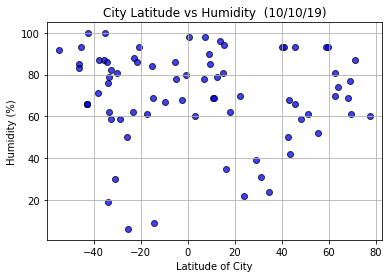

In [22]:
latitude=cities_df.loc[:, "Lat"]
humidity=cities_df.loc[:, "Humidity"]

plt.scatter(latitude, humidity, marker="o", facecolors="blue", edgecolors="black", alpha=.75)

plt.xlim(min(cities_df["Lat"]-5), max(cities_df["Lat"]+5))
plt.ylim(min(cities_df["Humidity"])-5, max(cities_df["Humidity"]+5))

plt.title(f"City Latitude vs Humidity  ({weatherdate})")
plt.xlabel("Latitude of City")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('Humidity_vs_Lat')
plt.show()

#### Latitude vs. Cloudiness Plot

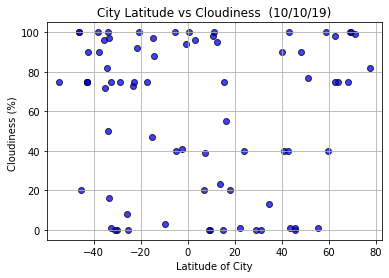

In [23]:
latitude=cities_df.loc[:, "Lat"]
clouds=cities_df.loc[:, "Cloudiness"]

plt.scatter(latitude, clouds, marker="o", facecolors="blue", edgecolors="black", alpha=.75)

plt.xlim(min(cities_df["Lat"]-5), max(cities_df["Lat"]+5))
plt.ylim(min(cities_df["Cloudiness"])-5, max(cities_df["Cloudiness"]+5))

plt.title(f"City Latitude vs Cloudiness  ({weatherdate})")
plt.xlabel("Latitude of City")
plt.ylabel("Cloudiness (%) ")
plt.grid()
plt.savefig('Cloudiness_vs_Lat')
plt.show()

#### Latitude vs. Wind Speed Plot

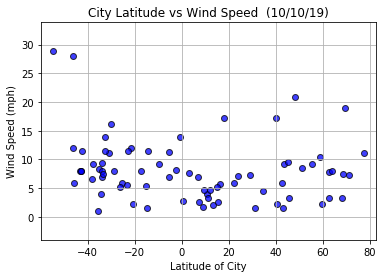

In [25]:
latitude=cities_df.loc[:, "Lat"]
windspeed=cities_df.loc[:, "Wind Speed"]

plt.scatter(latitude, windspeed, marker="o", facecolors="blue", edgecolors="black", alpha=.75)

plt.xlim(min(cities_df["Lat"]-5), max(cities_df["Lat"]+5))
plt.ylim(min(cities_df["Wind Speed"])-5, max(cities_df["Wind Speed"]+5))

plt.title(f"City Latitude vs Wind Speed  ({weatherdate})")
plt.xlabel("Latitude of City")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('WindSpeed_vs_Lat')
plt.show()